### Solar Phase Angle vs. Brightness Plot
This code reads the Pomenis observation database and creates a plot
of AB Magnitude vs. Solar Phase Angle

In [28]:
# Imports
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import numpy as np
import astropy.coordinates
import astropy.time
import lumos.calculator
import lumos.conversions
import csv
from datetime import datetime


In [29]:
# Read Pomenis database
data = pd.read_csv("../data/pomenis_observations.csv", comment = "#")

satellite_heights = 1000 * (data['satellite_height'].to_numpy())
observation_times = data['observation_time'].to_numpy()
satellite_altitudes = data['satellite_altitude'].to_numpy()
satellite_azimuths = data['satellite_azimuth'].to_numpy()
measured_magnitudes1 = data['ab_magnitude'].to_numpy()

mount_lemmon = astropy.coordinates.EarthLocation(lat = 32.4434, lon = -110.7881)

In [30]:
# Compute solar phase angles
sun_altitudes = np.zeros(observation_times.shape)
sun_azimuths = np.zeros(observation_times.shape)
solar_phase_angles = np.zeros(observation_times.shape)

for i, time in enumerate(observation_times):
    t = astropy.time.Time(time, format = 'isot')
    sun_altitudes[i], sun_azimuths[i] = lumos.calculator.get_sun_alt_az(t, mount_lemmon)

sat_x, sat_y, sat_z = lumos.conversions.altaz_to_unit(satellite_altitudes, satellite_azimuths)
sun_x, sun_y, sun_z = lumos.conversions.altaz_to_unit(sun_altitudes, sun_azimuths)

solar_phase_angles = np.arccos( - (sat_x * sun_x + sat_y * sun_y + sat_z * sun_z) )
solar_phase_angles1 = np.degrees(solar_phase_angles)

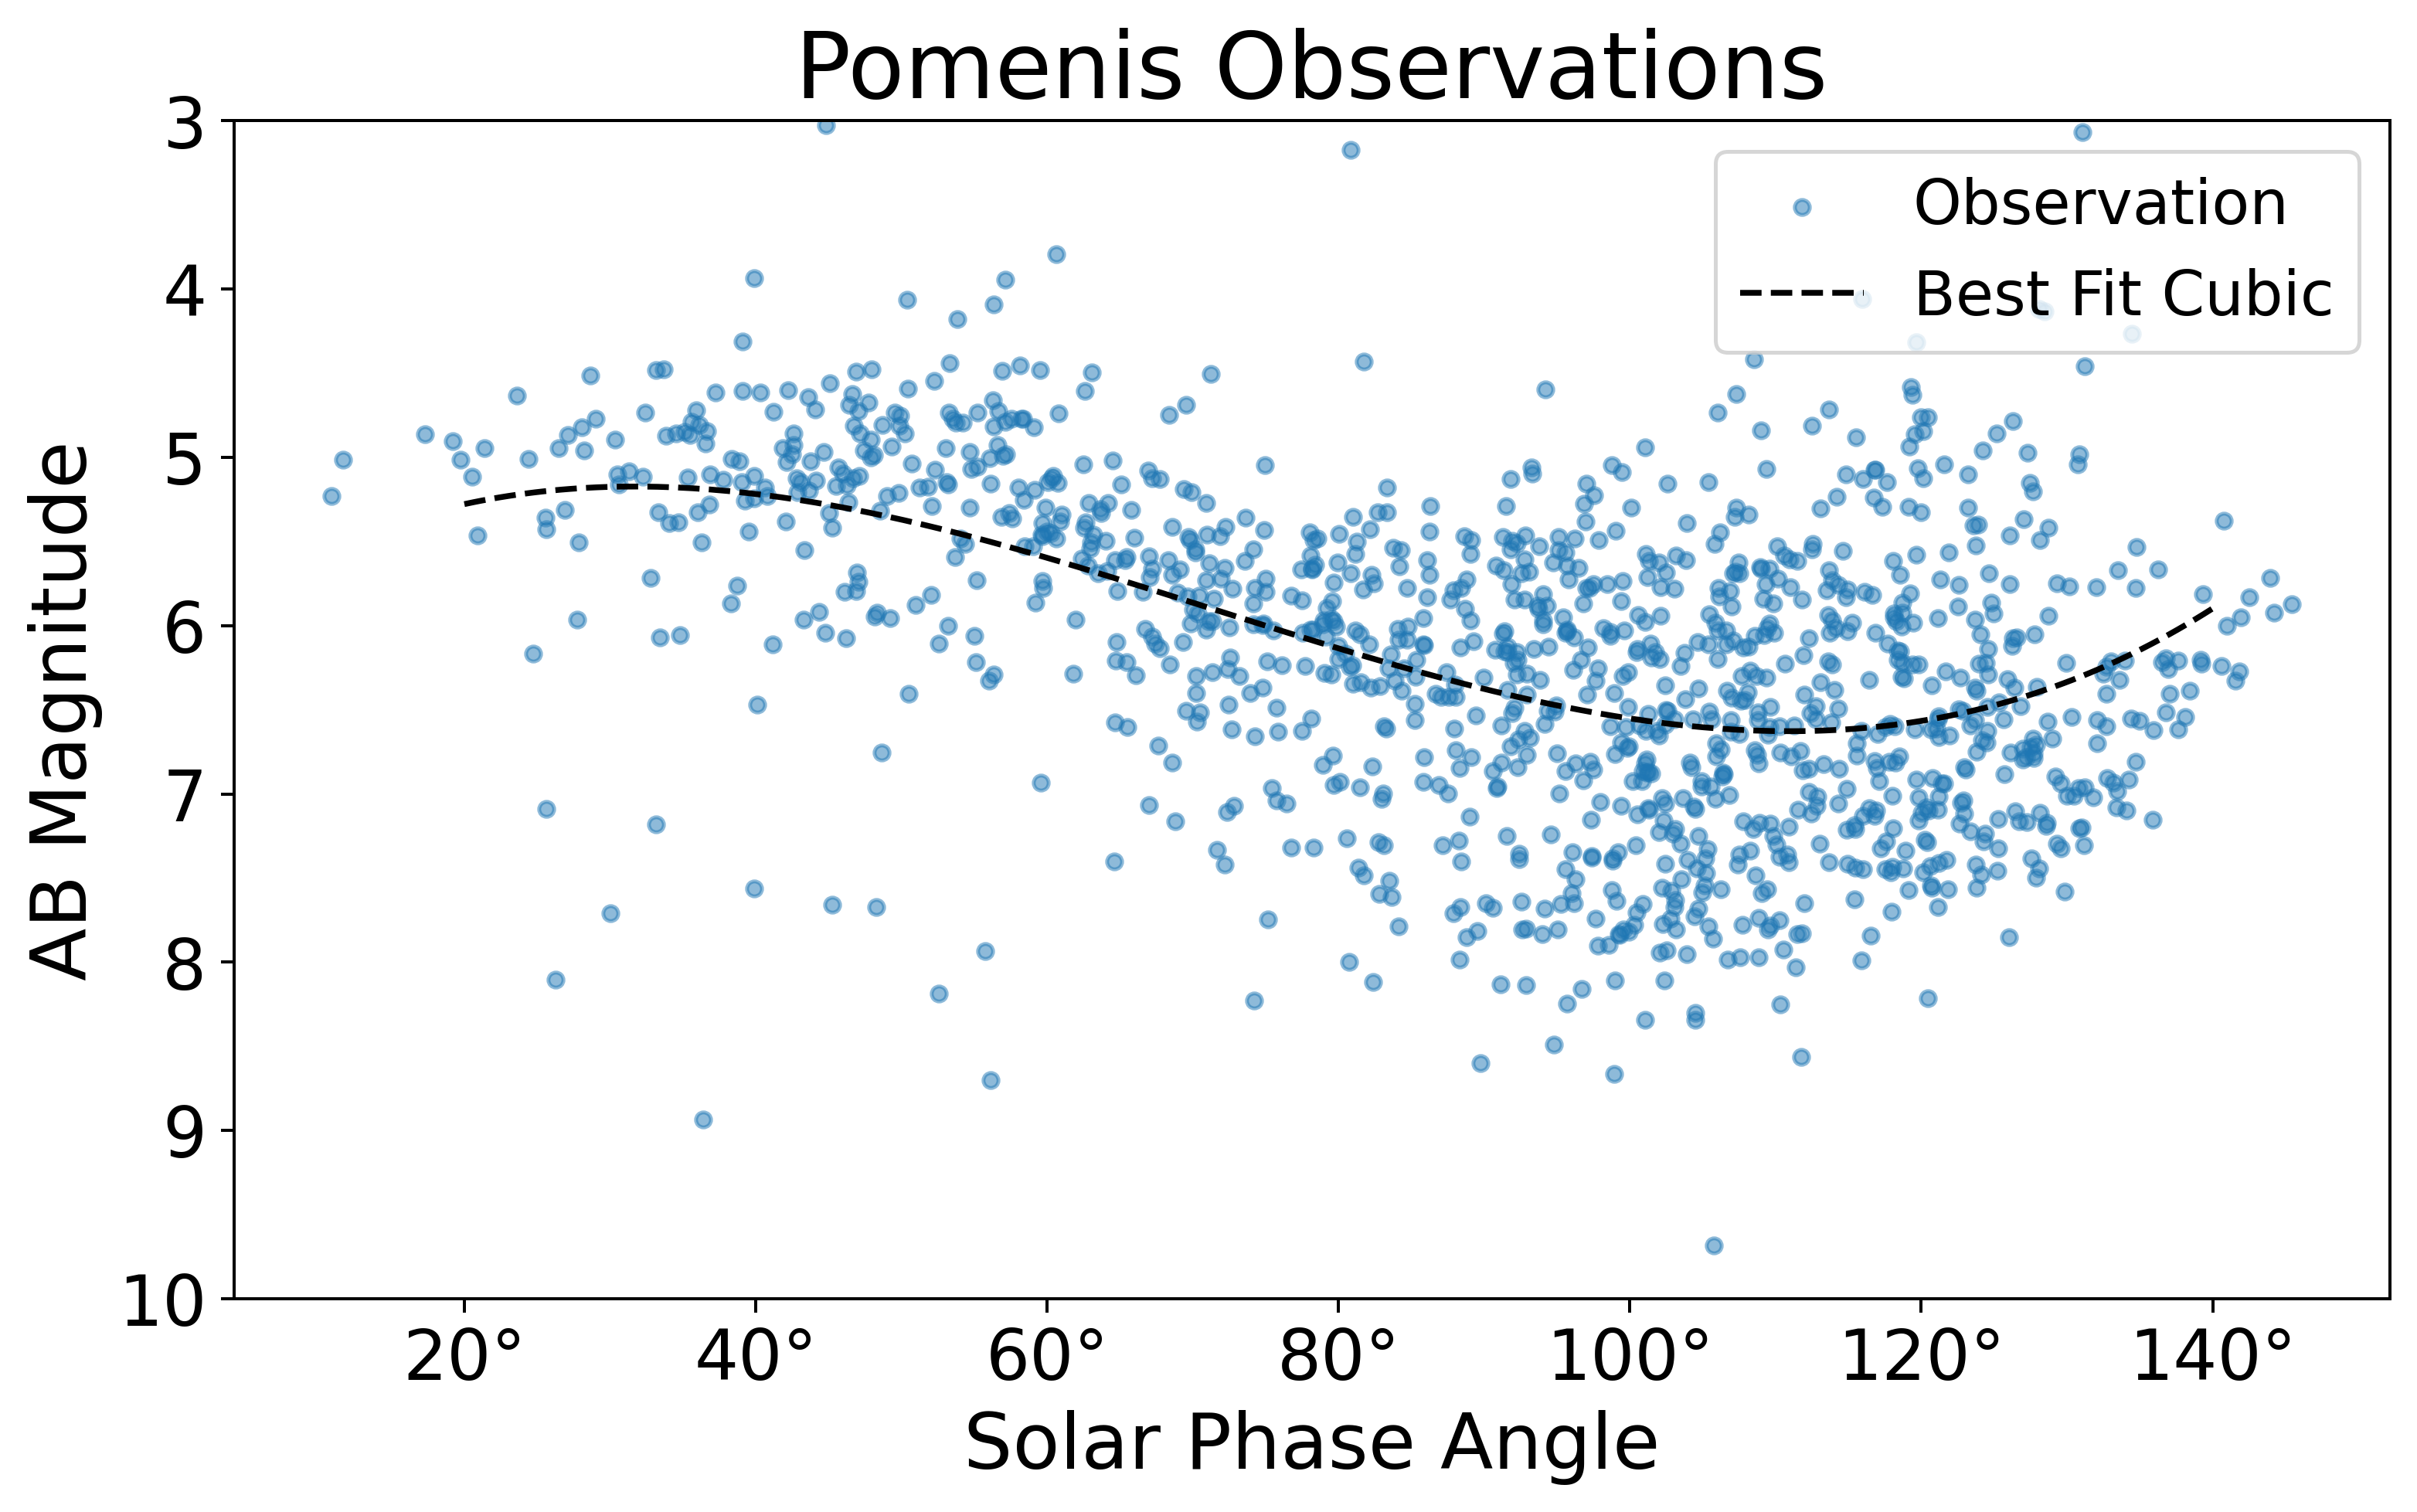

In [31]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize = (10, 5.5), dpi = 360)

ax.set_ylim(3, 10)
ax.invert_yaxis()
ax.set_xlabel("Solar Phase Angle", fontsize = 20)
ax.set_ylabel("AB Magnitude", fontsize = 20)
ax.set_title("Pomenis Observations", fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f}°"))

# Scatter plot of observations
ax.scatter(solar_phase_angles1, measured_magnitudes1,
           alpha = 0.5,
           s = 15,
           label = "Observation")

# Best Fit Cubic
a1, a2, a3, a4 = np.polyfit(solar_phase_angles1, measured_magnitudes1, deg = 3)
x = np.linspace(20, 140, 200)
y = a1*x**3 + a2*x**2 + a3*x + a4
ax.plot(x, y, "--k", label = "Best Fit Cubic")

ax.legend(loc = 1, prop = {'size': 16})
plt.show()

In [32]:
# Define the file path
csv_file_path = 'Data.csv'
#initialize the variable
norad_id=[]
sat_name=[]
sat_model=[]
img_start=[]
img_end=[]
loc=[]
v_mag=[]
v_mag_error=[]
exp_photon_flux=[]
effective_albedo=[]
ra_astro=[]
dec_astro=[]
tle_source=[]
ra=[]
dec=[]
pos_error=[]
ele=[]
azi=[]
vel_deg_sec=[]
airmass=[]
orbit_height=[]
ranges=[]
solar_elongation=[]
sun_ele=[]
sun_azi=[]



# Open the CSV file
with open(csv_file_path, 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)
    next(csv_reader, None)

    # Read and process the data row by row
    for row in csv_reader:
        # Each row is a list of values
        norad_id_1=int(row[0])
        sat_name_1=row[1]
        sat_model_1=row[2]
        img_start_1=row[3]
        img_end_1=row[4]
        loc_1=row[5]
        v_mag_1=float(row[6])
        v_mag_error_1=float(row[7])
        exp_photon_flux_1=float(row[8])
        effective_albedo_1=float(row[9])
        ra_astro_1=float(row[10])
        dec_astro_1=float(row[11])
        tle_source_1=row[12]
        ra_1=float(row[13])
        dec_1=float(row[14])
        pos_error_1=float(row[15])
        ele_1=float(row[16])
        azi_1=float(row[17])
        vel_deg_sec_1=float(row[18])
        airmass_1=float(row[19])
        orbit_height_1=float(row[20])
        ranges_1=float(row[21])
        solar_elongation_1=float(row[22])
        sun_ele_1=float(row[23])
        sun_azi_1=float(row[24])
        
        norad_id.append(norad_id_1)
        sat_name.append(sat_name_1)
        sat_model.append(sat_model_1)
        img_start.append(img_start_1)
        img_end.append(img_end_1)
        loc.append(loc_1)
        v_mag.append(v_mag_1)
        v_mag_error.append(v_mag_error_1)
        exp_photon_flux.append(exp_photon_flux_1)
        effective_albedo.append(effective_albedo_1)
        ra_astro.append(ra_astro_1)
        dec_astro.append(dec_astro_1)
        tle_source.append(tle_source_1)
        ra.append(ra_1)
        dec.append(dec_1)
        pos_error.append(pos_error_1)
        ele.append(ele_1)
        azi.append(azi_1)
        vel_deg_sec.append(vel_deg_sec_1)
        airmass.append(airmass_1)
        orbit_height.append(orbit_height_1)
        ranges.append(ranges_1)
        solar_elongation.append(solar_elongation_1)
        sun_ele.append(sun_ele_1)
        sun_azi.append(sun_azi_1)



In [33]:
sv1_0=[]
for i in range(0,len(sat_model)):
    if sat_model[i]=="STARLINK v1.5":
        sv1_0.append(i)
        


In [34]:
sv1_0_indices = [int(index) for index in sv1_0]

satellite_heights = [1000 * orbit_height[index] for index in sv1_0_indices]
satellite_altitudes = [ele[index] for index in sv1_0_indices]
satellite_azimuths =[azi[index] for index in sv1_0_indices]
measured_magnitudes2=[v_mag[index] for index in sv1_0_indices]
observation_times_O = [img_start[index] for index in sv1_0_indices]


mount_lemmon = astropy.coordinates.EarthLocation(lat = 32.4434, lon = -110.7881)
Biosphere=astropy.coordinates.EarthLocation(lat = 32.58057, lon = -110.8490)



In [36]:
def convert_timestamps(timestamps):
    converted_timestamps = []
    for ts in timestamps:
        # Parse the timestamp string into a datetime object
        original_date = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S.%f')
        # Format the datetime object into the desired format
        formatted_date = original_date.strftime('%Y-%m-%dT%H:%M:%S')
        converted_timestamps.append(formatted_date)
    return converted_timestamps

In [37]:
observation_times = convert_timestamps(observation_times_O)

In [38]:
# Compute solar phase angles
#sun_altitudes = [sun_ele[index] for index in sv1_0_indices]
#sun_azimuths = [sun_azi[index] for index in sv1_0_indices]
sun_altitudes = np.zeros(len(observation_times))
sun_azimuths = np.zeros(len(observation_times))
solar_phase_angles = np.zeros(len(observation_times))

for i, time in enumerate(observation_times):
    t = astropy.time.Time(time, format = 'isot')
    if loc=='Mount Lemmon':
        sun_altitudes[i], sun_azimuths[i] = lumos.calculator.get_sun_alt_az(t, mount_lemmon)
    else:
        sun_altitudes[i], sun_azimuths[i] = lumos.calculator.get_sun_alt_az(t, mount_lemmon)

sat_x, sat_y, sat_z = lumos.conversions.altaz_to_unit(np.array(satellite_altitudes),np.array(satellite_azimuths))
sun_x, sun_y, sun_z = lumos.conversions.altaz_to_unit(np.array(sun_altitudes), np.array(sun_azimuths))

solar_phase_angles = np.arccos( - (sat_x * sun_x + sat_y * sun_y + sat_z * sun_z) )
solar_phase_angles2 = np.degrees(solar_phase_angles)

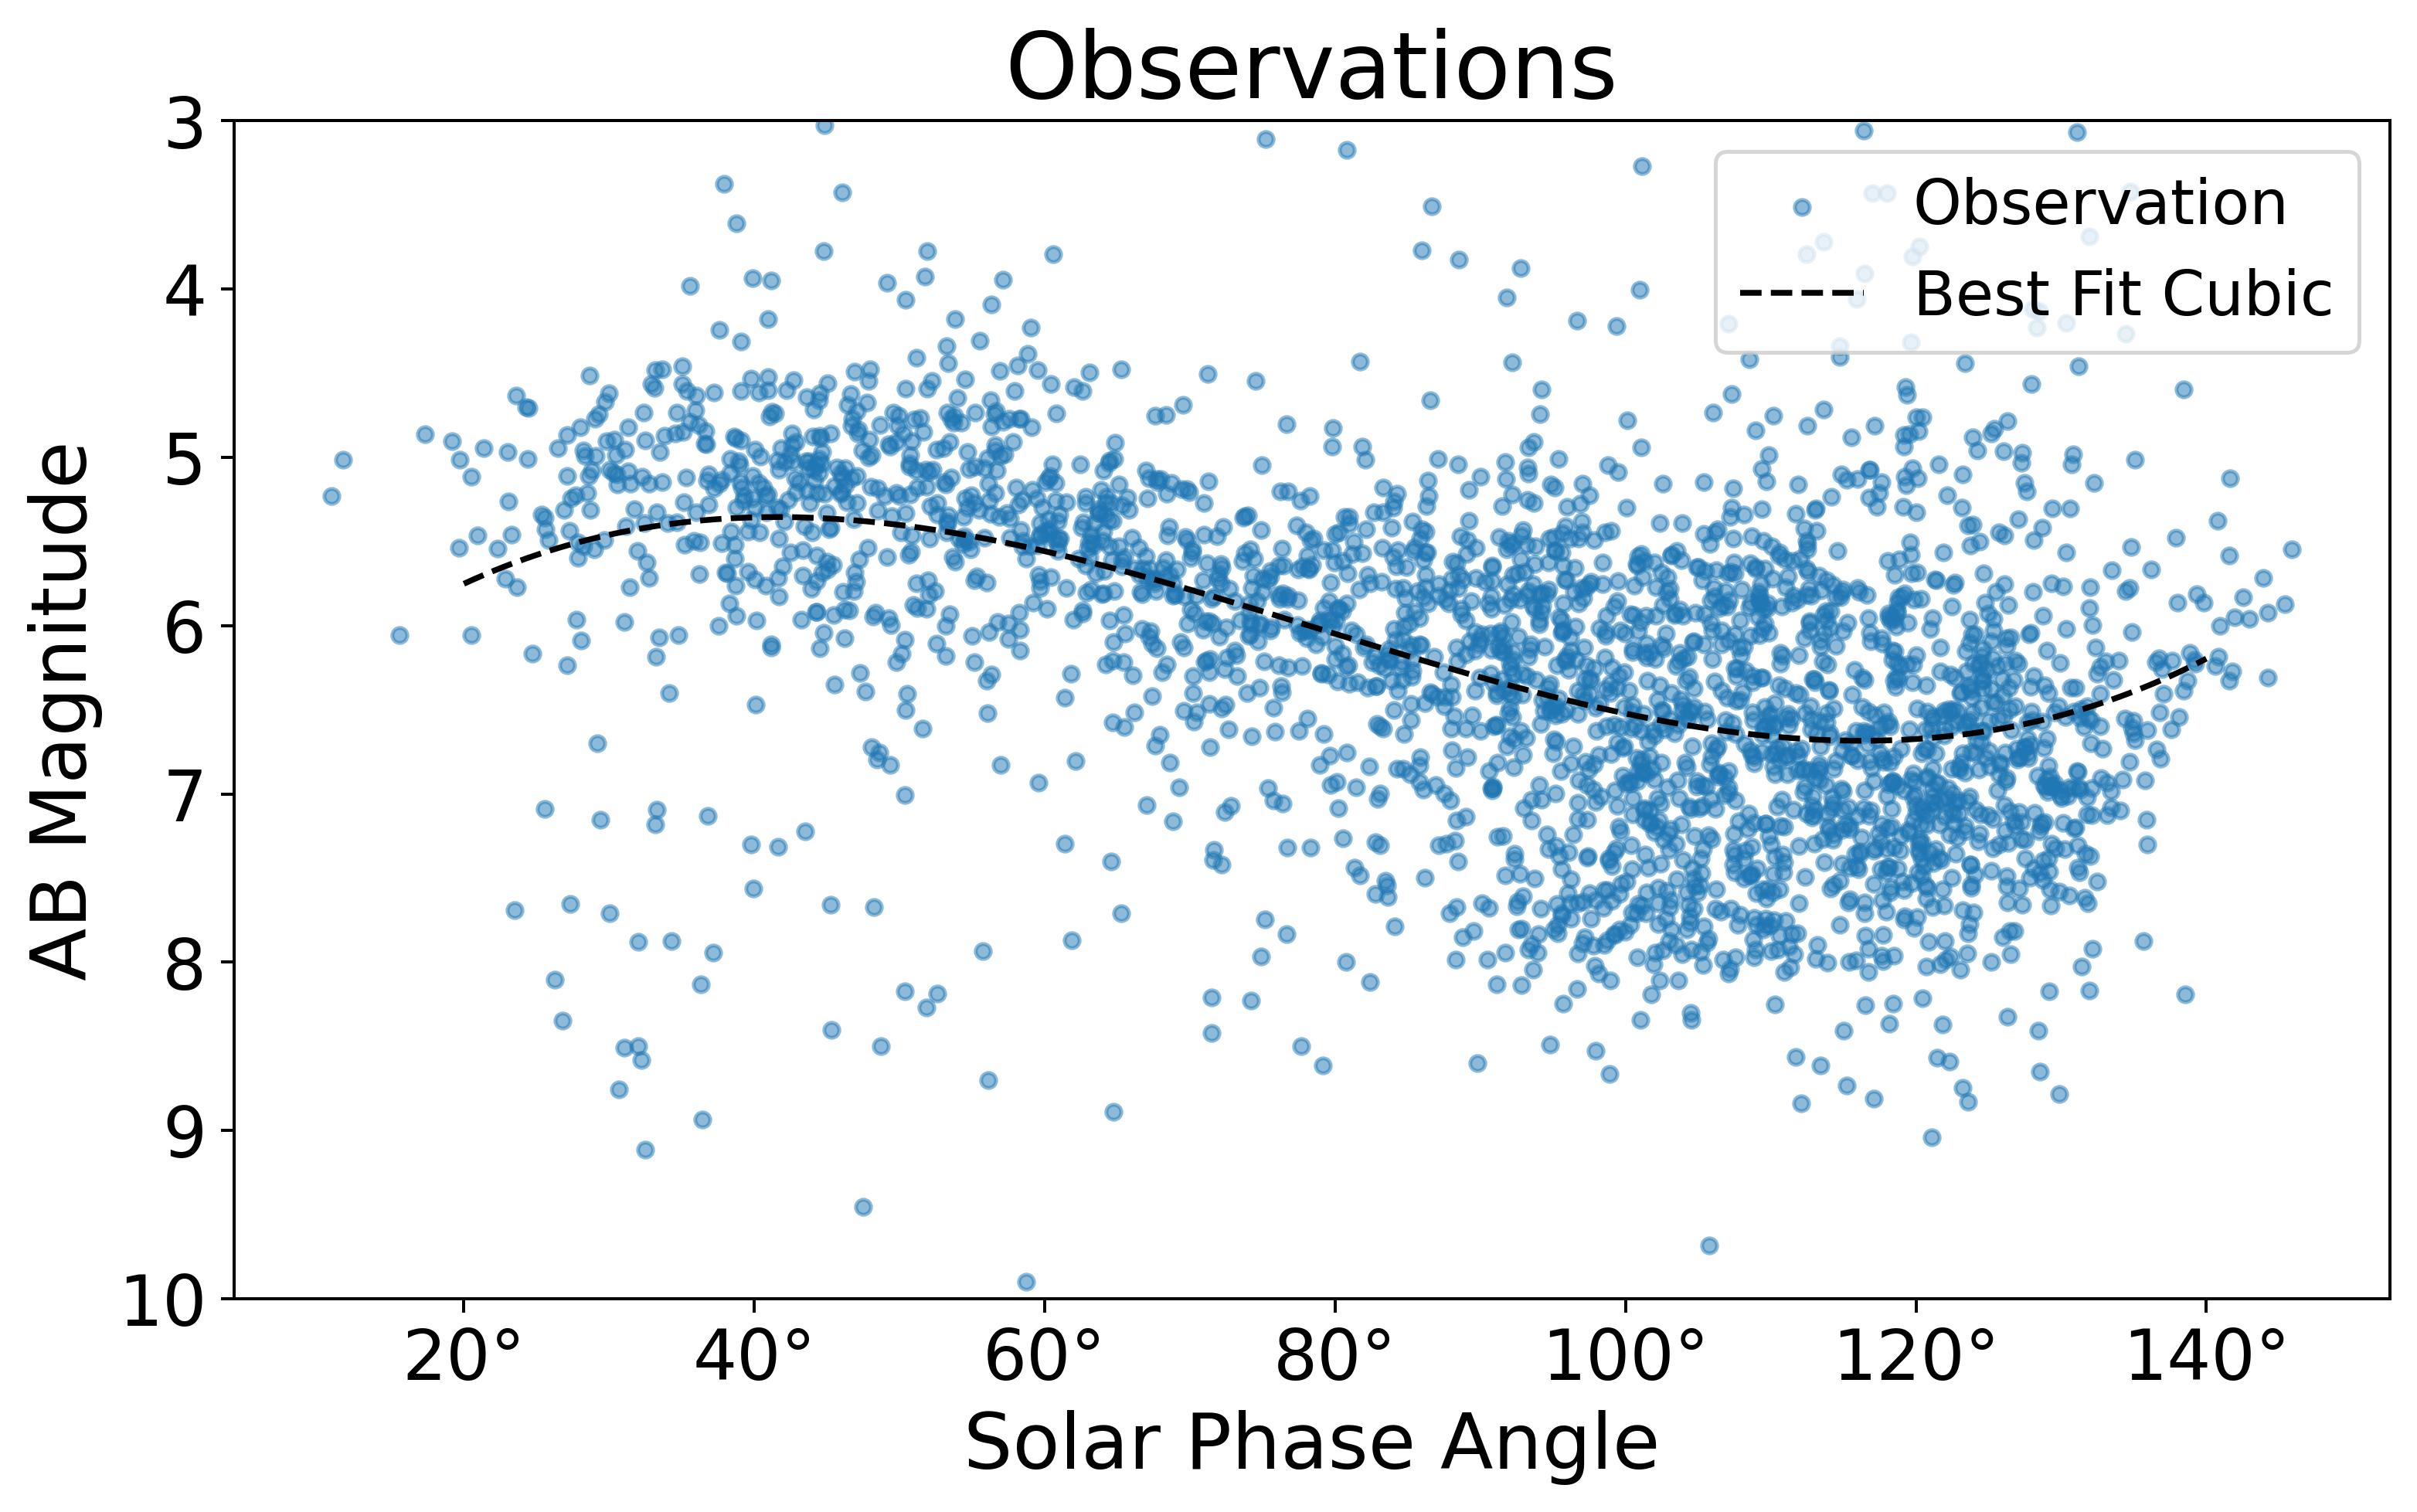

In [46]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize = (10, 5.5), dpi = 360)

ax.set_ylim(3, 10)
ax.invert_yaxis()
ax.set_xlabel("Solar Phase Angle", fontsize = 20)
ax.set_ylabel("AB Magnitude", fontsize = 20)
ax.set_title("Observations", fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f}°"))

# Scatter plot of observations
ax.scatter(solar_phase_angles2, measured_magnitudes2,
           alpha = 0.5,
           s = 15,
           label = "Observation")

# Best Fit Cubic
a1, a2, a3, a4 = np.polyfit(solar_phase_angles2, measured_magnitudes2, deg = 3)
x = np.linspace(20, 140, 200)
y = a1*x**3 + a2*x**2 + a3*x + a4
ax.plot(x, y, "--k", label = "Best Fit Cubic")

ax.legend(loc = 1, prop = {'size': 16})
plt.show()

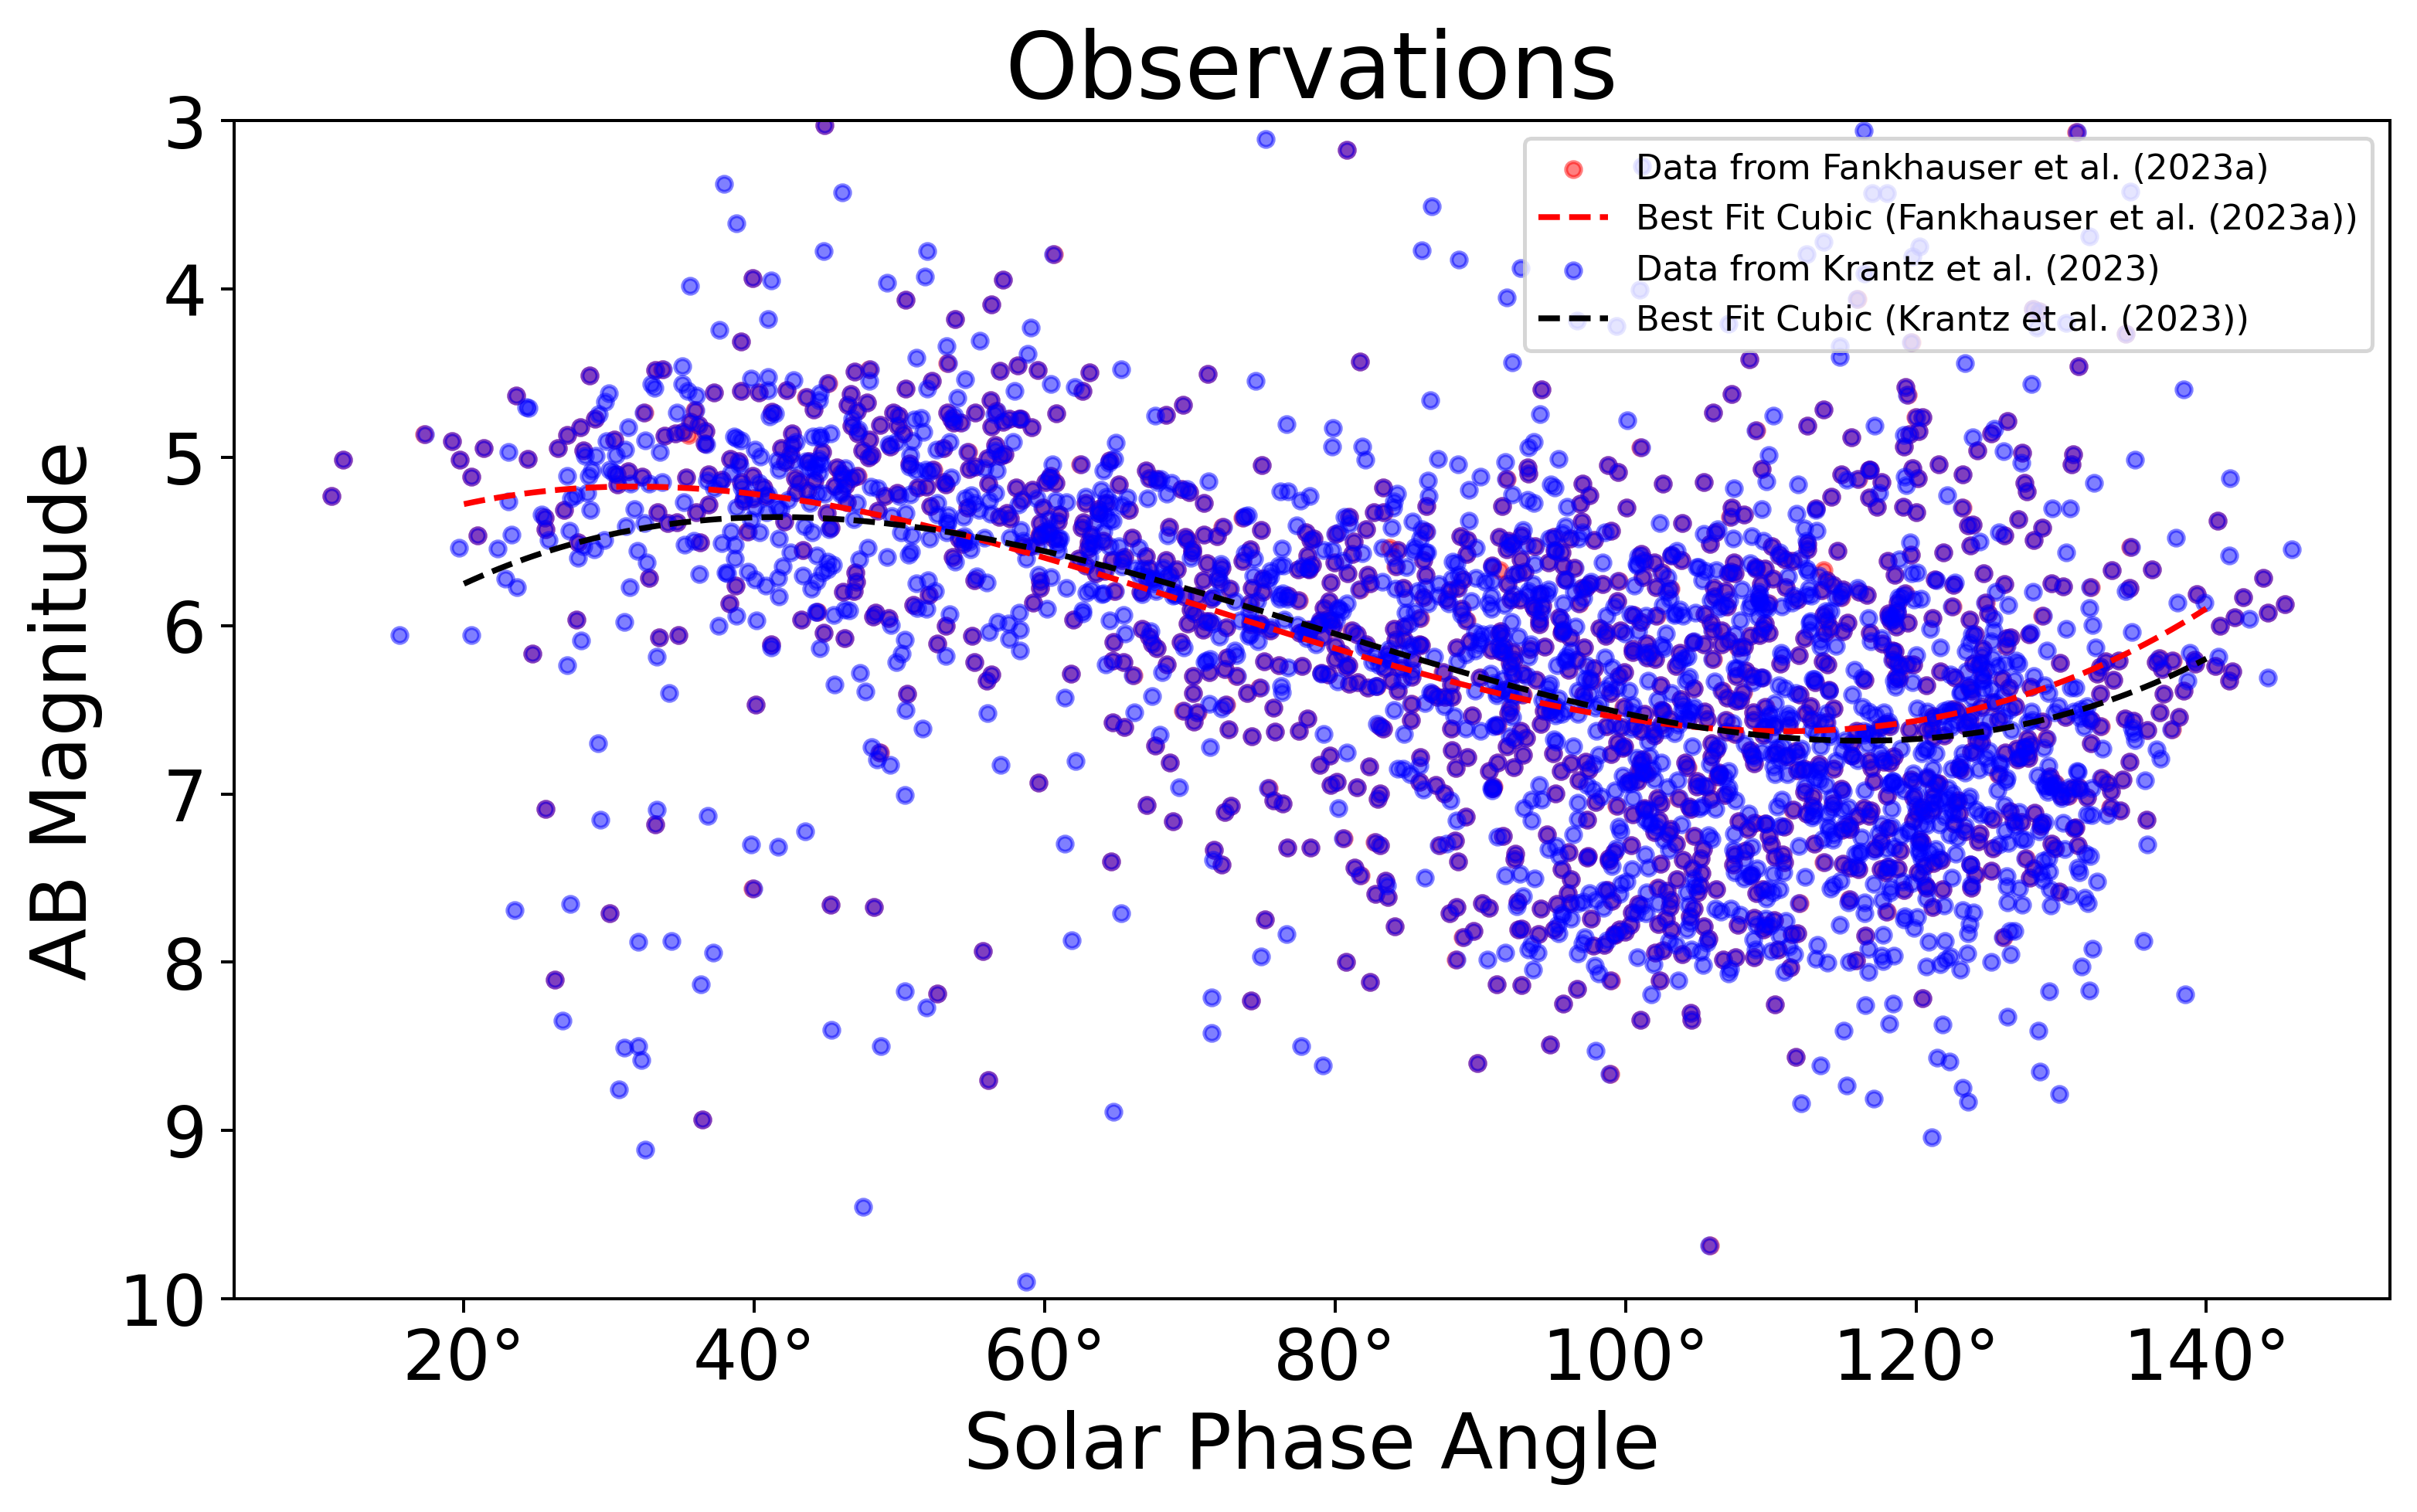

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5.5), dpi=360)

# Set common properties for both sets of data
ax.set_ylim(3, 10)
ax.invert_yaxis()
ax.set_xlabel("Solar Phase Angle", fontsize=20)
ax.set_ylabel("AB Magnitude", fontsize=20)
ax.set_title("Observations", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x:.0f}°"))

# Scatter plot of observations for the first set with blue color
ax.scatter(solar_phase_angles1, measured_magnitudes1,
            alpha=0.5,
            s=15,
            label="Data from Fankhauser et al. (2023a)",
            color='red')

# Best Fit Cubic for the first set with blue color
a1, a2, a3, a4 = np.polyfit(solar_phase_angles1, measured_magnitudes1, deg=3)
x = np.linspace(20, 140, 200)
y = a1 * x**3 + a2 * x**2 + a3 * x + a4
ax.plot(x, y, "--", label="Best Fit Cubic (Fankhauser et al. (2023a))", color='red')

# Scatter plot of observations for the second set with red color
ax.scatter(solar_phase_angles2, measured_magnitudes2,
            alpha=0.5,
            s=15,
            label="Data from Krantz et al. (2023)",
            color='blue')

# Best Fit Cubic for the second set with red color
a1, a2, a3, a4 = np.polyfit(solar_phase_angles2, measured_magnitudes2, deg=3)
x = np.linspace(20, 140, 200)
y = a1 * x**3 + a2 * x**2 + a3 * x + a4
ax.plot(x, y, "--", label="Best Fit Cubic (Krantz et al. (2023))", color='black')

ax.legend(loc=1, prop={'size': 9})

# Show the combined plot
plt.show()